<a href="https://colab.research.google.com/github/graziaperna/CV-project/blob/main/Smarthome_process_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=bfeee5e3f7978cea9dd6a1cd32689a61e635554f4efd348cd9b4d08db5a3faec
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24945 sha256=f3e75cd51115c760ecb1f11f2b1e2179a77bb1c8df4a55304e8bda9352855422
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [8]:
import pandas
import pm4py
import os

from matplotlib import pyplot as plt
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pt_visualiser
import pandas as pd

In [5]:
log = pandas.read_csv('https://raw.githubusercontent.com/ELENAZAZA/Formal-method-project/main/dataset.csv', sep=';', header=0)
d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')

# Convert to log format
log = pm4py.convert_to_event_log(d_log)


<ipython-input-5-ea64650e9add>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

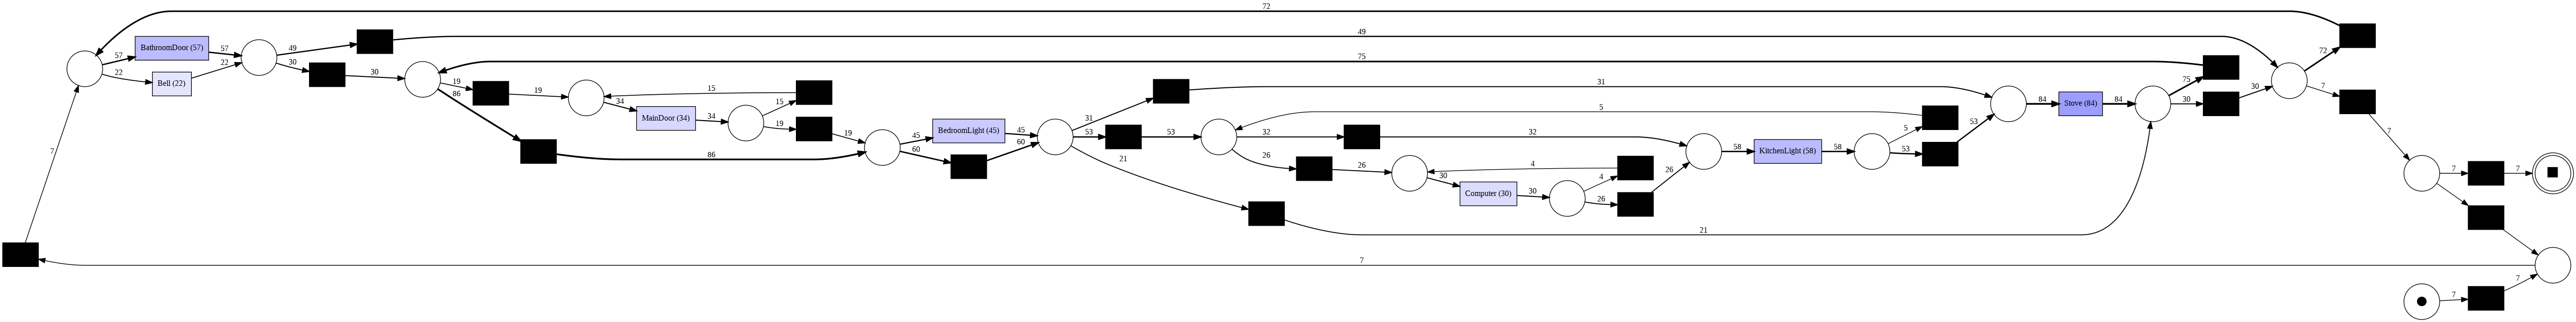

In [6]:
net, im, fm =pm4py.discover_petri_net_inductive(log)
pm4py.save_vis_petri_net(net, im, fm, 'petri_net.png')

graph_visualisation = pt_visualiser.apply(net, im, fm, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNet.png')

In [19]:
replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
wrong_log = pandas.read_csv('https://raw.githubusercontent.com/ELENAZAZA/Formal-method-project/main/dataset_problems.CSV', sep=';', header=0)
dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
# Convert to log format
logw = pm4py.convert_to_event_log(dw_log)

<ipython-input-10-2c92d045fb8d>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [11]:
netw, imw, fmw =pm4py.discover_petri_net_inductive(logw)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

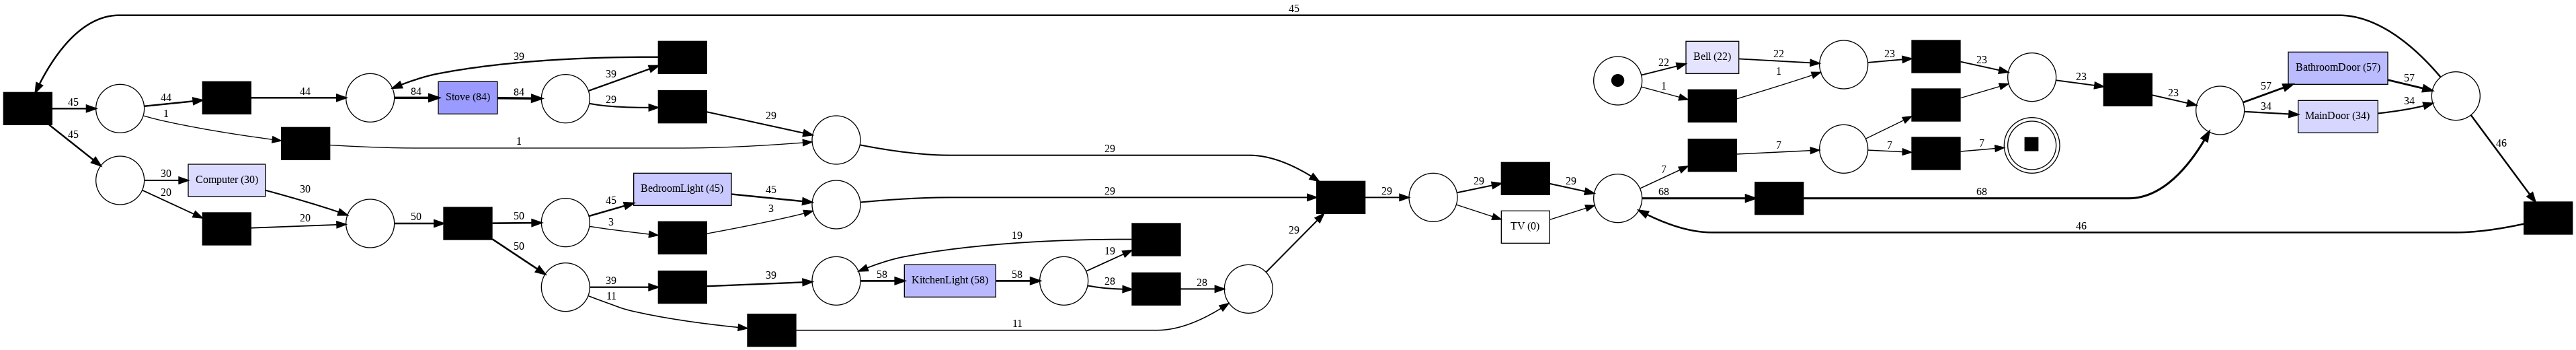

In [12]:
pm4py.save_vis_petri_net(netw, imw, fmw, 'petri_netw.png')

graph_visualisation = pt_visualiser.apply(netw, imw, fmw, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNetw.png')

In [13]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

parameters_tbr = {token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.DISABLE_VARIANTS: True, token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.ENABLE_PLTR_FITNESS: True}
replayed_traces, place_fitness, trans_fitness, unwanted_activities = token_based_replay.apply(logw, net, im, fm, parameters=parameters_tbr)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

## **Conformance Checking**

In [16]:
i=0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']

for i in range (len(replayed_traces)):
  print(day[i])

  if( (replayed_traces[i]['trace_is_fit']) == True ):
      print("L'attività si adatta al modello.")
  else:
      print("L'attività non si adatta al modello.")

  print("Trace fitness: ",  end="")
  print("{:.3f}".format(replayed_traces[i]['trace_fitness']))
  print(" \n")

Lunedi
L'attività non si adatta al modello.
Trace fitness: 0.875
 

Martedi
L'attività non si adatta al modello.
Trace fitness: 0.958
 

Mercoledi
L'attività non si adatta al modello.
Trace fitness: 0.941
 

Giovedi
L'attività non si adatta al modello.
Trace fitness: 0.972
 

Venerdi
L'attività non si adatta al modello.
Trace fitness: 0.974
 

Sabato
L'attività si adatta al modello.
Trace fitness: 1.000
 

Domenica
L'attività si adatta al modello.
Trace fitness: 1.000
 



In [17]:
print("Transizioni del modello attivate dal dataset sbagliato:\n")

#per contare transizioni non nulle
i=0
j=0
contatore = 0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']
transizioni = list()
for i in range (len(replayed_traces)):
  for j in range (len(replayed_traces[i]['activated_transitions'])):
    if(replayed_traces[i]['activated_transitions'][j].label != None):
      contatore += 1
  transizioni.append(contatore)
  contatore = 0

#per stampare transizioni non nulle
contatore = 0

for i in range (len(replayed_traces)):
  print(day[i])
  for j in range (len(replayed_traces[i]['activated_transitions'])):
    if(replayed_traces[i]['activated_transitions'][j].label != None):
      print(replayed_traces[i]['activated_transitions'][j].label, end="")
      contatore += 1
      if(contatore != transizioni[i]):
        print(" -> ", end="")
  print("\n")
  contatore = 0

Transizioni del modello attivate dal dataset sbagliato:

Lunedi
MainDoor -> KitchenLight -> MainDoor -> BathroomDoor -> BedroomLight

Martedi
BathroomDoor -> Computer -> Stove -> BedroomLight -> KitchenLight -> Stove -> BathroomDoor

Mercoledi
MainDoor -> Stove -> Computer -> Stove -> BedroomLight -> MainDoor -> MainDoor -> BedroomLight -> KitchenLight -> Stove -> BathroomDoor

Giovedi
Bell -> BathroomDoor -> Stove -> Computer -> KitchenLight -> Stove -> KitchenLight -> BedroomLight -> BathroomDoor

Venerdi
Bell -> BathroomDoor -> Stove -> Computer -> Stove -> BedroomLight -> MainDoor -> MainDoor -> KitchenLight -> Stove -> BathroomDoor

Sabato
Bell -> BathroomDoor -> BathroomDoor -> Stove -> KitchenLight -> Stove -> BedroomLight -> Stove -> BathroomDoor -> MainDoor

Domenica
Bell -> BathroomDoor -> Stove -> Computer -> KitchenLight -> Stove -> BedroomLight -> MainDoor -> MainDoor -> KitchenLight -> Stove -> MainDoor



In [18]:
#Vedere le transizioni che non combaciano con il modello
#lista di lista di transizioni
i=0
j=0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']
print("Attivita' con anomalie: \n\n")
for i in range (len(replayed_traces)):
  print(day[i])
  if(bool(replayed_traces[i]['transitions_with_problems'])):
    for j in range (len(replayed_traces[i]['transitions_with_problems'])):
      print(replayed_traces[i]['transitions_with_problems'][j].label)
  else:
      print("Nessuna anomalia riscontrata. \n")
  print("\n")

Attivita' con anomalie: 


Lunedi
MainDoor
MainDoor


Martedi
Stove


Mercoledi
MainDoor
Stove


Giovedi
BedroomLight


Venerdi
Stove


Sabato
Nessuna anomalia riscontrata. 



Domenica
Nessuna anomalia riscontrata. 



